In [1]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local


# !time conda install -c schrodinger pymol

%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2019-11-24 11:03:10--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M  85.3MB/s    in 0.8s    

2019-11-24 11:03:16 (85.3 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
 

In [2]:
!time conda install -q -y -c bioconda biopython
!time conda install -q -y -c conda-forge rdkit openbabel seaborn
!time conda install -q -y -c bioconda autodock-vina 

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - biopython


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.74             |   py37h7b6447c_0         2.0 MB
    blas-1.0                   |              mkl           6 KB
    intel-openmp-2019.4        |              243         729 KB
    libgfortran-ng-7.3.0       |       hdf63c60_0        1006 KB
    mkl-2019.4                 |              243       131.2 MB
    mkl-service-2.3.0          |   py37he904b0f_0         218 KB
    mkl_fft-1.0.15             |   py37ha843d7b_0         172 KB
    mkl_random-1.1.0           |   py37hd6b4f25_0         321 KB
    numpy-1.17.3               |   py37hd14ec0e_0           4 KB
    numpy-base-1.17.3          |   py37hde5b4d6_0         5.2 MB
    ------------------------------------------------------------
 

In [3]:
!apt install openbabel

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libopenbabel4v5
The following NEW packages will be installed:
  libopenbabel4v5 openbabel
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 2,766 kB of archives.
After this operation, 11.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenbabel4v5 amd64 2.3.2+dfsg-3build1 [2,664 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openbabel amd64 2.3.2+dfsg-3build1 [102 kB]
Fetched 2,766 kB in 2s (1,364 kB/s)
Selecting previously unselected package libopenbabel4v5.
(Reading database ... 145605 files and directories currently installed.)
Preparing to unpack .../libopenbabel4v5_2.3.2+dfsg-3build1_amd64.deb ...


In [55]:
!wget -c http://kinemage.biochem.duke.edu/php/downlode-3.php?filename=/../downloads/software/reduce31/reduce.3.23.130521.linuxi386.gz -O reduce.gz
!gzip -k -d reduce.gz
!chmod +x reduce

--2019-11-24 11:17:57--  http://kinemage.biochem.duke.edu/php/downlode-3.php?filename=/../downloads/software/reduce31/reduce.3.23.130521.linuxi386.gz
Resolving kinemage.biochem.duke.edu (kinemage.biochem.duke.edu)... 152.16.14.25
Connecting to kinemage.biochem.duke.edu (kinemage.biochem.duke.edu)|152.16.14.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 765658 (748K) [application/octet-stream]
Saving to: ‘reduce.gz’

reduce.gz           100%[===================>] 747.71K  1.36MB/s    in 0.5s    

2019-11-24 11:17:58 (1.36 MB/s) - ‘reduce.gz’ saved [765658/765658]



In [1]:
!git clone https://github.com/gmum/MLinPL2019_cheminfo_workshops.git
os.chdir("MLinPL2019_cheminfo_workshops/notebooks/cadd")
!git pull

In [0]:
%load_ext autoreload

%autoreload 2

In [0]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from tqdm import tqdm_notebook as tqdm

In [0]:
def ecfp_from_smiles(smi,radius=2, nBits=1024):
    """
Computes ECFP fingerprint from a SMILES
    :param smi: str; SMILES of a molecule
    :param radius: int; Radius of ECFP fingerprint
    :param nBits: int; Number of bits for the final FP
    :return: list of ints; Final fingerprint as a list of ints
    """
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        return None
    return list(AllChem.GetMorganFingerprintAsBitVect(
        mol,
        radius,
        nBits=nBits,
        useChirality=False,
        useBondTypes=True,
        useFeatures=False)
    )

def draw_from_smiles(collection, align_to_core=None, **kwargs):
    """
Draw molecules from smiles contained in a list or pandas DataFrame
    :param collection: list or pandas.DataFrame; collection to draw from
    :param align_to_core: rdkit.Chem.Mol or None; optional, substructure to align the structures to
    :param kwargs: rdkit.Chem.Draw kwargs
    :return: PIL Image object; Drawn molecules
    """
    if isinstance(collection, pd.DataFrame):
        assert "SMILES" in collection.columns, "DataFrame should contain SMILES column"
        if align_to_core is not None:
            mols = [aligned_mol(s, core=align_to_core) for s in collection.SMILES]
        else:
            mols = [AllChem.MolFromSmiles(s) for s in collection.SMILES]
    elif isinstance(collection, list):
        if align_to_core is not None:
            mols = [aligned_mol(s, core=align_to_core) for s in collection]
        else:
            mols = [AllChem.MolFromSmiles(s) for s in collection]
    else:
        raise TypeError
    return Draw.MolsToGridImage(mols, **kwargs)

In [0]:
def map_index_as_prop(mol):
    for atom in mol.GetAtoms():
        atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
    return mol

In [0]:
import torch

def fingerprint_similarity_by_one(fp1, fp2):
    """Calculate one-to-one or one-to-many fingerprint Tanimoto similarity using CUDA
    :param fp1: list or array; Reference fingerprint as a numpy array or a list of ints
    :param fp2: list of lists or numpy.array; Single fingerprint or a list of fingerprints to compare to
    :return: numpy.array; Array of Tanimoto distances of fingerprints to the reference fingerprint
    """
    #.reshape(1, -1)
    fp1 = torch.tensor(fp1, dtype=torch.float32).cuda()
    fp2 = torch.tensor(fp2, dtype=torch.float32).cuda()
    output = torch.sum(fp1*fp2, dim=1)/torch.sum(torch.clamp(fp1+fp2, min=0, max=1), dim=1).cpu().numpy()
    torch.cuda.empty_cache()
    return output

def fingerprint_similarity_all(fp1, fp2):
    """Calculate one-to-one or one-to-many fingerprint Tanimoto similarity using CUDA
    :param fp1: list or array; Reference fingerprint as a numpy array or a list of ints
    :param fp2: list of lists or numpy.array; Single fingerprint or a list of fingerprints to compare to
    :return: numpy.array; Array of Tanimoto distances of fingerprints to the reference fingerprint
    """
    #.reshape(1, -1)
    fp1 = torch.tensor(fp1, dtype=torch.float32)#.cuda()
    fp2 = torch.tensor(fp2, dtype=torch.float32)#.cuda()
    mul = torch.matmul(fp1,fp2.t()).float()
    sum1 = torch.sum(fp1, dim=1)
    sum2 = torch.sum(fp2, dim=1)
    del fp1, fp2
    r_sum1 = sum1.repeat(sum2.shape[0],1).float()
    r_sum2 = sum2.repeat(sum1.shape[0],1).float()
    del sum1, sum2
    output = mul/((r_sum2+r_sum1.t())-mul)
    final_output = output.numpy()#.cpu()
    del output, mul, r_sum1, r_sum2
    #torch.cuda.empty_cache()
    return final_output

# Let's load some compounds

## Random compounds from ChEMBL database

In [11]:
random_cmpds = pd.read_csv("data/100000_random_compounds.csv")
random_cmpds.head()

,chembl_id,SMILES
0,CHEMBL2355484,COc1ccc2c3c([nH]c2c1)[C@H](CO)N(CC34CN(C4)S(=O...
1,CHEMBL3448965,CCC(=O)N1CCC(C1)c2nc3CCN(C)Cc3c(NC)n2
2,CHEMBL3699590,COc1cc(ccc1Nc2ncc(Cl)c(Nc3cccc(NC(=O)C=C)c3)n2...
3,CHEMBL249574,CC(C)Oc1ccc(Nc2c(cnc3cc(ccc23)c4ccncc4)C(=O)N)cc1
4,CHEMBL2112609,CC(C)CNC(=O)C(=C)C[C@H](O)[C@H](CC1CCCCC1)NC(=...


## Let's see who SMILES

In [12]:
smi = random_cmpds["SMILES"][0]
print(smi)

COc1ccc2c3c([nH]c2c1)[C@H](CO)N(CC34CN(C4)S(=O)(=O)c5ccccc5)C(=O)Nc6cccc(F)c6


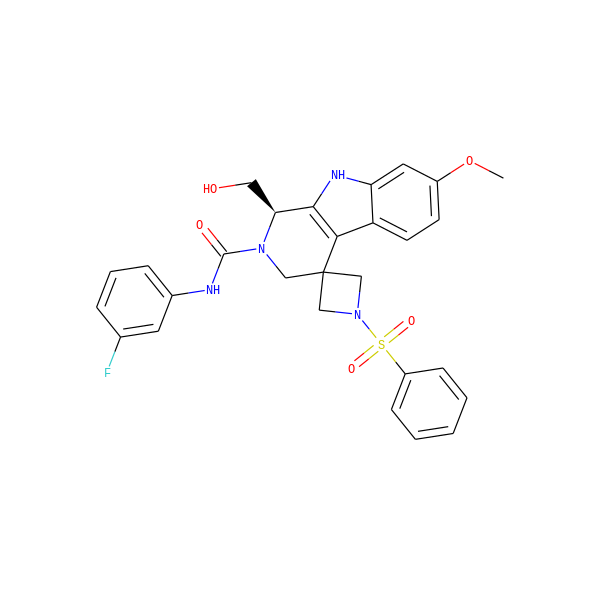

In [13]:
mol = Chem.MolFromSmiles(smi)
Draw.MolToImage(mol, size=(600,600))

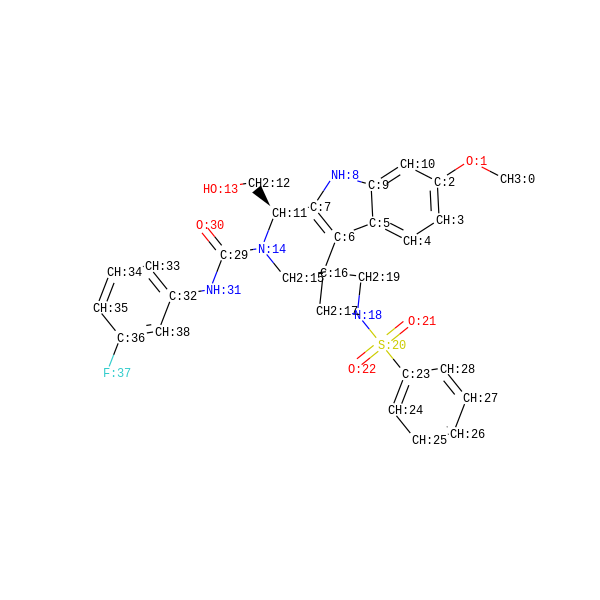

In [14]:
mol = map_index_as_prop(mol)
Draw.MolToImage(mol, size=(600,600))

In [15]:
smi = Chem.MolToSmiles(mol)
print(smi)

[CH3:0][O:1][c:2]1[cH:3][cH:4][c:5]2[c:6]3[c:7]([nH:8][c:9]2[cH:10]1)[C@H:11]([CH2:12][OH:13])[N:14]([C:29](=[O:30])[NH:31][c:32]1[cH:33][cH:34][cH:35][c:36]([F:37])[cH:38]1)[CH2:15][C:16]31[CH2:17][N:18]([S:20](=[O:21])(=[O:22])[c:23]2[cH:24][cH:25][cH:26][cH:27][cH:28]2)[CH2:19]1


## Compounds reported for Dopamine D2 receptor

In [16]:
drd2_compounds = pd.read_csv("data/chembl_25_Dopamine_D2_receptor.csv")
drd2_compounds.head()

,compound_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,target_name,organism,assay_description,assay_type,Ki [nM]
0,CHEMBL2,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)c4occc4,IC50,NaN,NaN,NaN,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,NaN
1,CHEMBL2,COc1cc2nc(nc(N)c2cc1OC)N3CCN(CC3)C(=O)c4occc4,Ki,NaN,NaN,NaN,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,NaN
2,CHEMBL3,CN1CCC[C@H]1c2cccnc2,IC50,NaN,NaN,NaN,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,NaN
3,CHEMBL3,CN1CCC[C@H]1c2cccnc2,Ki,NaN,NaN,NaN,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,NaN
4,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc4C(=O)C(=CN1c24)C(=O)O,IC50,NaN,NaN,NaN,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,NaN


In [0]:
drd2_compounds.drop_duplicates("compound_chembl_id", inplace=True)


# Let's draw

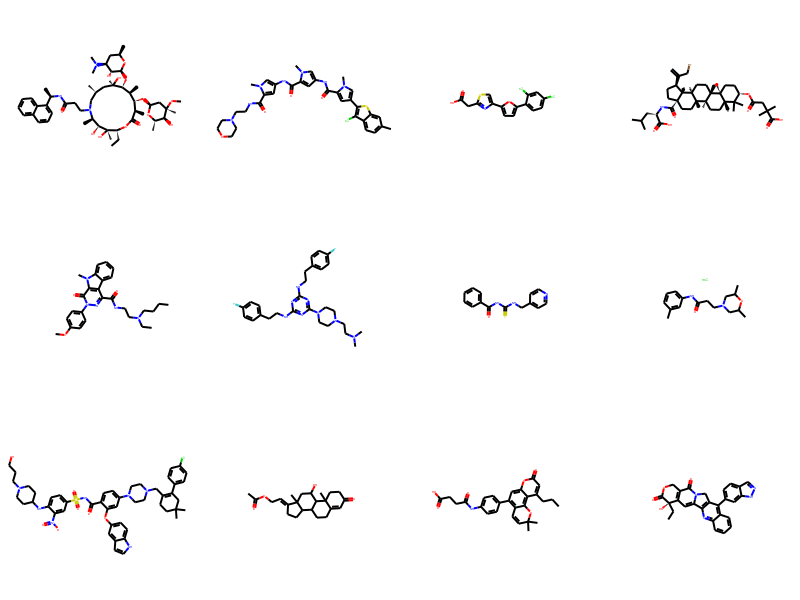

In [18]:
draw_from_smiles( list(np.random.choice(random_cmpds["SMILES"], 12)), molsPerRow=4)

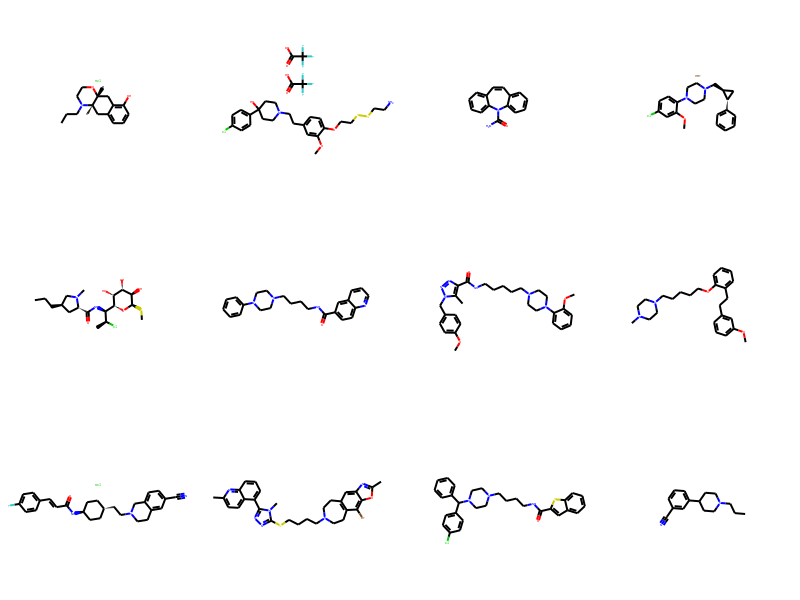

In [19]:
draw_from_smiles( list(np.random.choice(drd2_compounds["canonical_smiles"], 12)), molsPerRow=4)

# Let's be more specific

In [20]:
drd2_active = pd.read_csv("data/DRD2_active.csv")
drd2_active.head()

,Unnamed: 0,compound_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,target_name,organism,assay_description,assay_type,Ki [nM]
0,35,CHEMBL269004,CCCN(CCC)[C@H]1CCc2c(O)cccc2C1,Ki,=,6.0,nM,Dopamine D2 receptor,Homo sapiens,Binding affinity was evaluated by calculating ...,B,6.0
1,36,CHEMBL269004,CCCN(CCC)[C@H]1CCc2c(O)cccc2C1,Ki,=,14.0,nM,Dopamine D2 receptor,Homo sapiens,Binding affinity was evaluated by calculating ...,B,14.0
2,38,CHEMBL269004,CCCN(CCC)[C@H]1CCc2c(O)cccc2C1,EC50,=,41.0,nM,Dopamine D2 receptor,Homo sapiens,Agonist activity at human cloned dopamine D2 r...,F,20.5
3,39,CHEMBL269004,CCCN(CCC)[C@H]1CCc2c(O)cccc2C1,Ki,=,7.1,nM,Dopamine D2 receptor,Homo sapiens,Displacement of [3H]spiperone from human D2S r...,B,7.1
4,88,CHEMBL26,CCN1CCCC1CNC(=O)c2cc(ccc2OC)S(=O)(=O)N,Ki,=,68.0,nM,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,68.0


In [21]:
drd2_active.drop_duplicates("compound_chembl_id", inplace=True)
drd2_active.head()

,Unnamed: 0,compound_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,target_name,organism,assay_description,assay_type,Ki [nM]
0,35,CHEMBL269004,CCCN(CCC)[C@H]1CCc2c(O)cccc2C1,Ki,=,6.0,nM,Dopamine D2 receptor,Homo sapiens,Binding affinity was evaluated by calculating ...,B,6.00
4,88,CHEMBL26,CCN1CCCC1CNC(=O)c2cc(ccc2OC)S(=O)(=O)N,Ki,=,68.0,nM,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,68.00
8,132,CHEMBL268799,Clc1ccc(cc1)N2CCN(Cc3c[nH]c4ccccc34)CC2,Ki,=,71.0,nM,Dopamine D2 receptor,Homo sapiens,Binding affinity towards cloned human Dopamine...,B,71.00
9,133,CHEMBL442,CN1C[C@@H](C=C2[C@H]1Cc3c[nH]c4cccc2c34)C(=O)N...,IC50,=,4.3,nM,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,2.15
11,170,CHEMBL42,CN1CCN(CC1)C2=Nc3cc(Cl)ccc3Nc4ccccc24,Ki,=,74.0,nM,Dopamine D2 receptor,Homo sapiens,Displacement of [3H]spiperone from human Dopam...,B,74.00


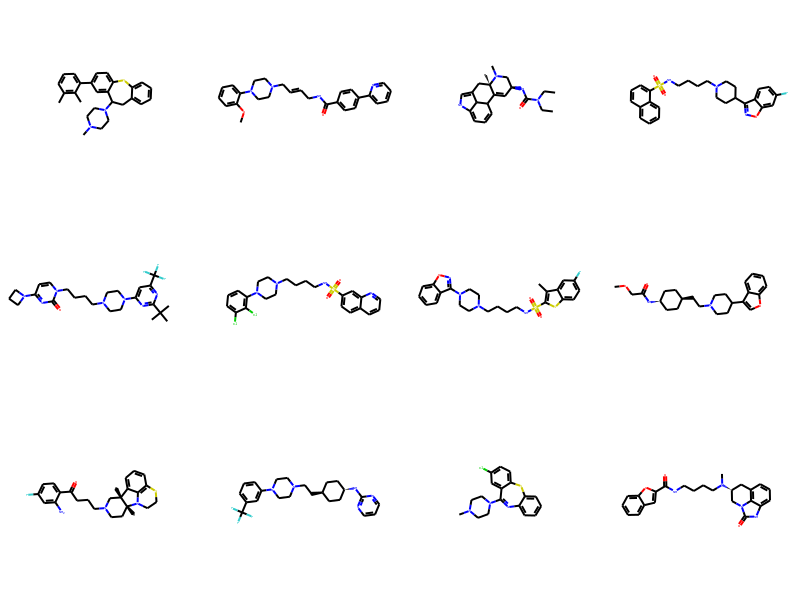

In [22]:
draw_from_smiles( list(np.random.choice(drd2_active["canonical_smiles"], 12)), molsPerRow=4)

In [23]:
drd2_inactive = pd.read_csv("data/DRD2_inactive.csv")
drd2_inactive.head()

,Unnamed: 0,compound_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,target_name,organism,assay_description,assay_type,Ki [nM]
0,20,CHEMBL6437,CN1CCN2C(C1)c3ccccc3Cc4ccccc24,IC50,=,7079.46,nM,Dopamine D2 receptor,Homo sapiens,Binding affinity for human cloned Dopamine rec...,B,3539.73
1,21,CHEMBL6437,CN1CCN2C(C1)c3ccccc3Cc4ccccc24,IC50,=,7079.46,nM,Dopamine D2 receptor,Homo sapiens,Binding affinity for human cloned Dopamine rec...,B,3539.73
2,22,CHEMBL6437,CN1CCN2C(C1)c3ccccc3Cc4ccccc24,Ki,=,2197.00,nM,Dopamine D2 receptor,Homo sapiens,Inhibition of [3H]-spiperone binding to human ...,B,2197.00
3,44,CHEMBL411,CC\C(=C(\CC)/c1ccc(O)cc1)\c2ccc(O)cc2,IC50,=,13321.00,nM,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,6660.50
4,45,CHEMBL411,CC\C(=C(\CC)/c1ccc(O)cc1)\c2ccc(O)cc2,Ki,=,4440.00,nM,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,4440.00


In [24]:
drd2_inactive.drop_duplicates("compound_chembl_id", inplace=True)
drd2_inactive.head()

,Unnamed: 0,compound_chembl_id,canonical_smiles,standard_type,standard_relation,standard_value,standard_units,target_name,organism,assay_description,assay_type,Ki [nM]
0,20,CHEMBL6437,CN1CCN2C(C1)c3ccccc3Cc4ccccc24,IC50,=,7079.46,nM,Dopamine D2 receptor,Homo sapiens,Binding affinity for human cloned Dopamine rec...,B,3539.730
3,44,CHEMBL411,CC\C(=C(\CC)/c1ccc(O)cc1)\c2ccc(O)cc2,IC50,=,13321.00,nM,Dopamine D2 receptor,Homo sapiens,DRUGMATRIX: Dopamine D2L radioligand binding (...,B,6660.500
5,98,CHEMBL27,CC(C)NCC(O)COc1cccc2ccccc12,IC50,>,5011.87,nM,Dopamine D2 receptor,Homo sapiens,Antagonist activity at human wild-type D2 rece...,B,2505.935
7,116,CHEMBL434,CC(C)NCC(O)c1ccc(O)c(O)c1,Ki,=,48000.00,nM,Dopamine D2 receptor,Homo sapiens,Displacement of [3H]spiperone from human D2L r...,B,48000.000
9,158,CHEMBL267014,Clc1ccc(cc1)N2CCN(Cc3c[nH]c4ncccc34)CC2,Ki,=,54000.00,nM,Dopamine D2 receptor,Homo sapiens,In vitro binding affinity at human cloned dopa...,B,54000.000


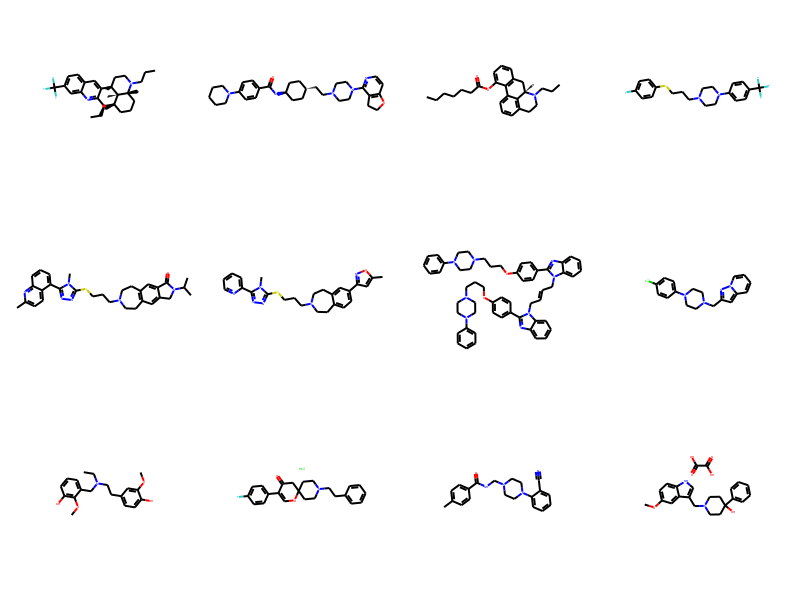

In [25]:
draw_from_smiles( list(np.random.choice(drd2_inactive["canonical_smiles"], 12)), molsPerRow=4)

## Wait, what?

In [26]:
drd2_compounds.drop_duplicates("compound_chembl_id",).shape[0] - drd2_active.shape[0] - drd2_inactive.shape[0]


4565

# Let's get some fingerprints

In [0]:
random_cmpds["ECFP"] = random_cmpds["SMILES"].apply(ecfp_from_smiles)

In [0]:
drd2_compounds["ECFP"] = drd2_compounds["canonical_smiles"].apply(ecfp_from_smiles)

In [0]:
drd2_active["ECFP"] = drd2_active["canonical_smiles"].apply(ecfp_from_smiles)

In [0]:
drd2_inactive["ECFP"] = drd2_inactive["canonical_smiles"].apply(ecfp_from_smiles)

## Let's check internal similarity

In [0]:
import seaborn as sns

In [0]:
random_cmpds_proper = random_cmpds.dropna(axis=0,how="any")

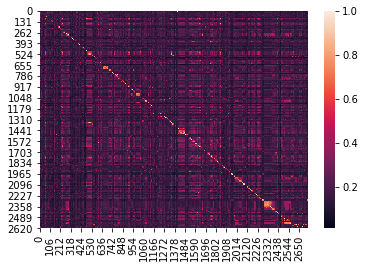

In [33]:
active_active = fingerprint_similarity_all(drd2_active["ECFP"],drd2_active["ECFP"])
sns.heatmap(active_active)

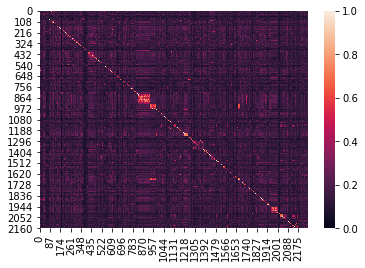

In [34]:
inactive_inactive = fingerprint_similarity_all(drd2_inactive["ECFP"],drd2_inactive["ECFP"])
sns.heatmap(inactive_inactive)

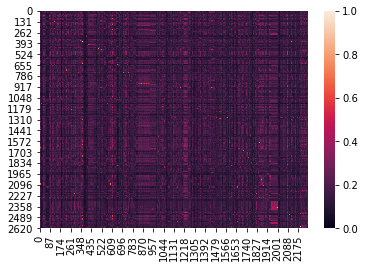

In [35]:
active_inactive = fingerprint_similarity_all(drd2_active["ECFP"],drd2_inactive["ECFP"])
sns.heatmap(active_inactive)

In [36]:
random_act = []
for n in tqdm(range(10)):
    random_act.append(fingerprint_similarity_all(list(random_cmpds[(n * 1000):((n + 1) * 1000)]["ECFP"]), drd2_active["ECFP"]))

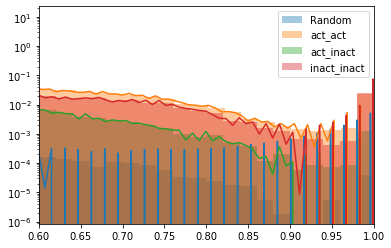

In [37]:
fig, ax1 = plt.subplots()
sns.distplot(np.concatenate(random_act).ravel(), label="Random")
sns.distplot(active_active.ravel(), label="act_act")
sns.distplot(active_inactive.ravel(), label="act_inact")
sns.distplot(inactive_inactive.ravel(), label="inact_inact")
plt.xlim(0.6,1)
ax1.set(yscale = "log")
plt.legend()

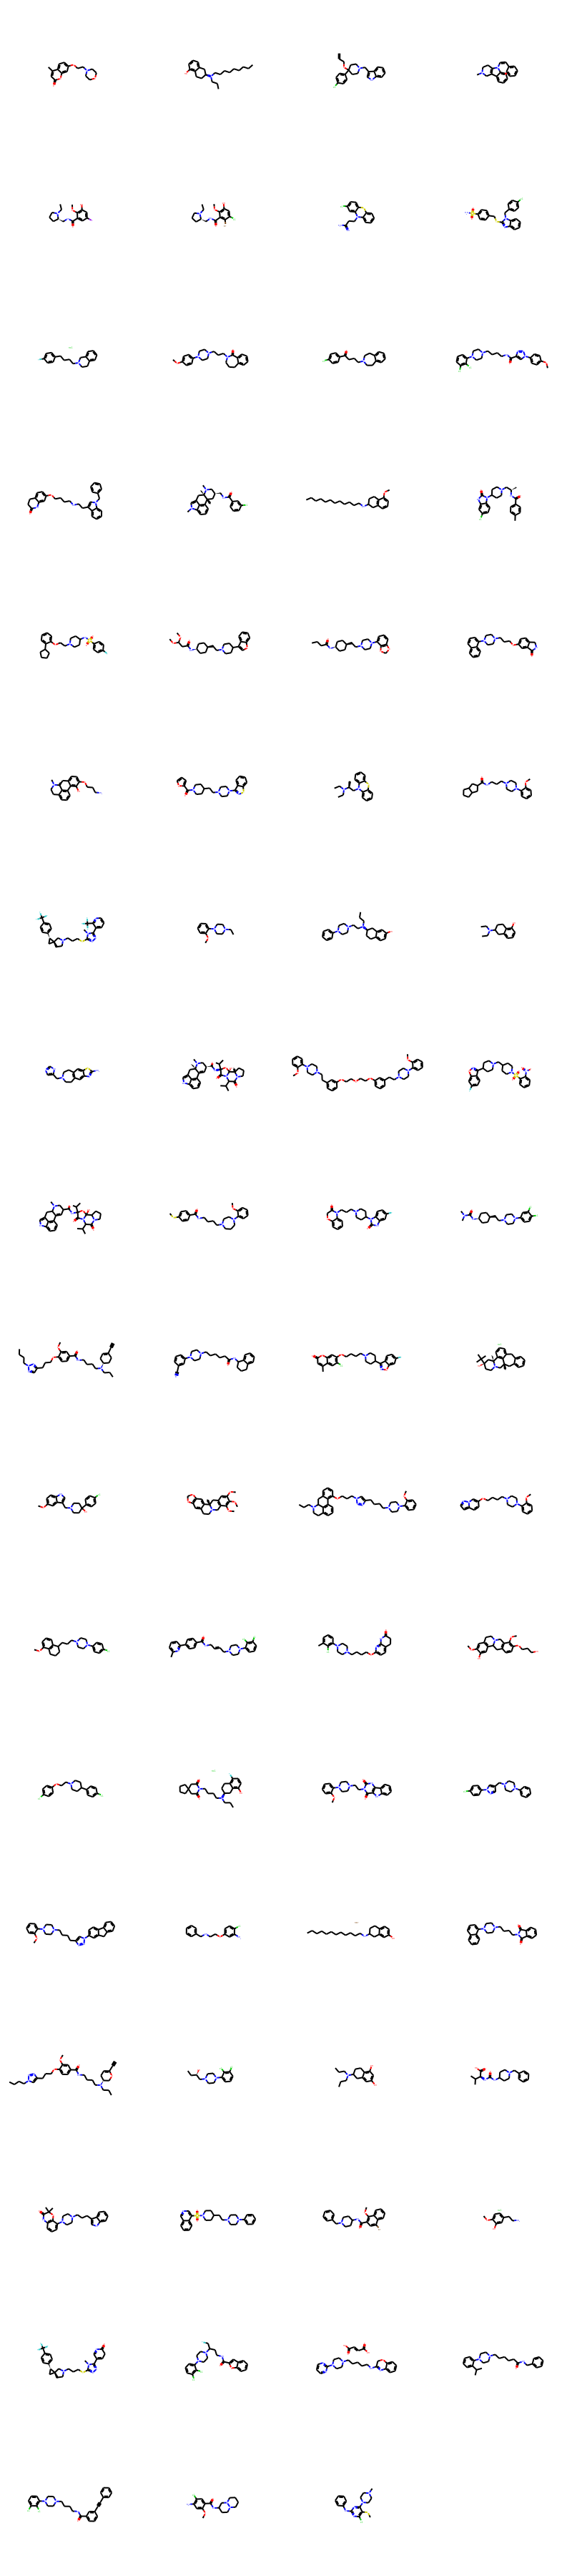

In [38]:
gt_06 = np.max(np.concatenate(random_act), axis=1) > 0.6
cmpds_gt_06 = random_cmpds[:10000].loc[gt_06]
draw_from_smiles(cmpds_gt_06, molsPerRow=4)

In [39]:
lt_02 = np.max(np.concatenate(random_act), axis=1) < 0.2
cmpds_lt_02 = random_cmpds[:10000].loc[lt_02]
print(cmpds_lt_02.shape)

(679, 3)


# Let's dock

In [0]:
from src.docking import dock_smiles, _read_dock_energy_from_sdf
from Bio import PDB

### Get PDB structure

In [0]:
parser = PDB.PDBParser()
structure = parser.get_structure(file="data/6cm4.pdb", id="drd2")

### Get binding pocket coordinates

In [42]:
coordinates = []
for residue in structure[0]["A"]:
    if residue.get_resname() != "8NU":
        continue
    for atom in residue:
        coordinates.append(atom.get_coord())
pocket_center = np.mean(coordinates,axis=0)
print(pocket_center)

[ 9.9250345  5.845933  -9.581866 ]


### Clean the protein

In [0]:
from src import xpdb
residues_to_remove = []
for residue in structure[0]["A"]:
    res_id = (residue.get_id())
    if res_id[0] != " ":
        residues_to_remove.append(res_id)
for residue in residues_to_remove:
    structure[0]["A"].detach_child(residue)
sloppyio = xpdb.SloppyPDBIO()
sloppyio.set_structure(structure)
sloppyio.save('data/6cm4_clean.pdb')

### All ready!

#### This part requires Autodock vina and OpenBabel software installed. PyMol is optional

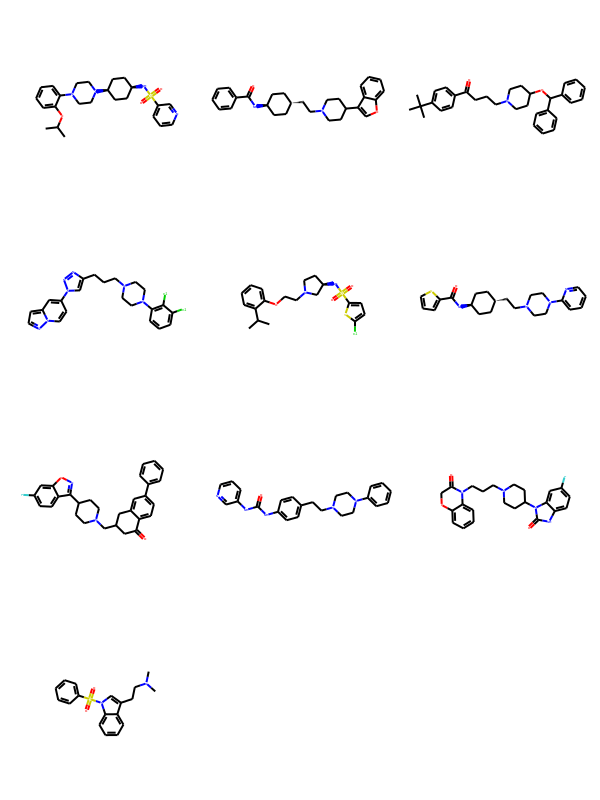

In [44]:
actives = np.random.choice(drd2_active["canonical_smiles"], 10)
draw_from_smiles(list(actives))

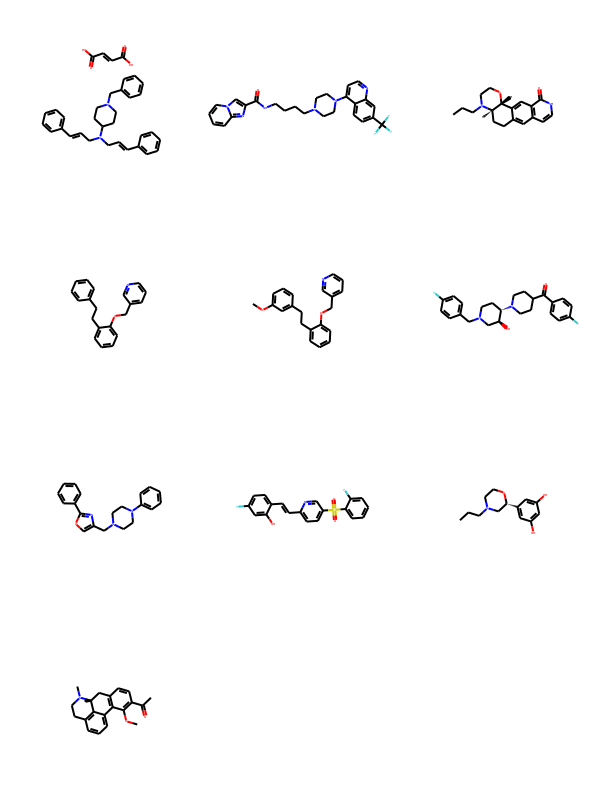

In [45]:
inactives = np.random.choice(drd2_inactive["canonical_smiles"], 10)
draw_from_smiles(list(inactives))

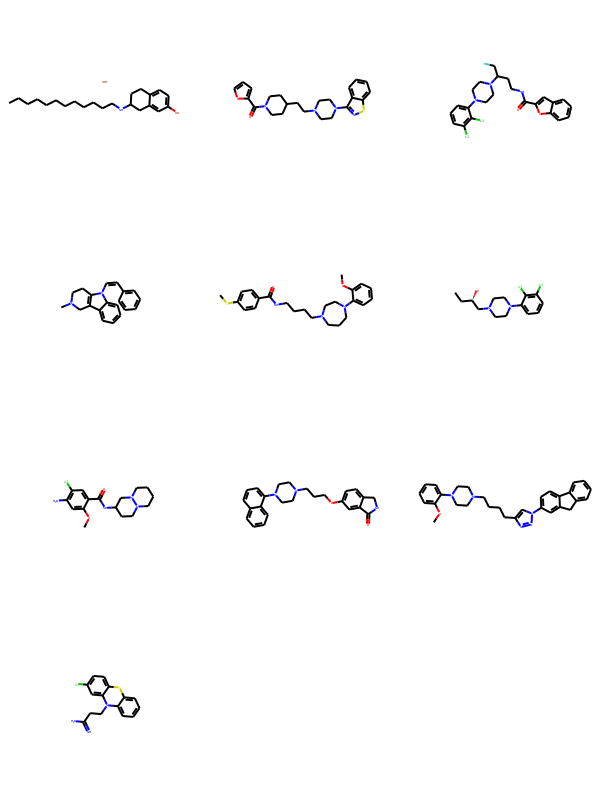

In [46]:
random_top = np.random.choice(cmpds_gt_06["SMILES"], 10)
draw_from_smiles(list(random_top))

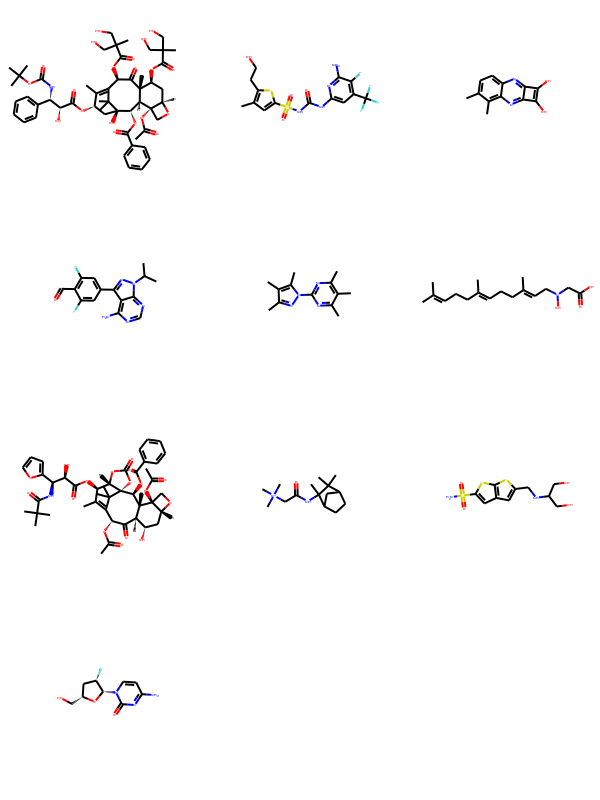

In [47]:
random_bottom = np.random.choice(cmpds_lt_02["SMILES"], 10)
draw_from_smiles(list(random_bottom))

In [0]:
import os
docked = [os.path.join(x,file) for x,y,z in os.walk("data/") for file in z if ".sdf" in file]
active_dock_energies = [_read_dock_energy_from_sdf(a) for a in docked if "_active" in a if _read_dock_energy_from_sdf(a) is not None]
inactive_dock_energies = [_read_dock_energy_from_sdf(a) for a in docked if "_inactive" in a if _read_dock_energy_from_sdf(a) is not None]
random_dock_energies_top = [_read_dock_energy_from_sdf(a) for a in docked if "_random_top" in a if _read_dock_energy_from_sdf(a) is not None]
random_dock_energies_bottom = [_read_dock_energy_from_sdf(a) for a in docked if "_random_bottom" in a if _read_dock_energy_from_sdf(a) is not None]

In [0]:
active_dock_energies = []
for index, active_smiles in tqdm(enumerate(actives)):
    energy = dock_smiles(active_smiles, "data/6cm4_clean.pdb", pocket_center, "active{}".format(index))
    if energy is None:
        continue
    active_dock_energies.append(energy)

In [0]:
inactive_dock_energies = []
for index, inactive_smiles in tqdm(enumerate(inactives)):
    energy = dock_smiles(inactive_smiles, "data/6cm4_clean.pdb", pocket_center, "inactive{}".format(index))
    if energy is None:
        continue
    inactive_dock_energies.append(energy)

In [0]:
random_dock_energies_top = []
for index, random_smiles in tqdm(enumerate(random_top)):
    energy = dock_smiles(random_smiles, "data/6cm4_clean.pdb", pocket_center, "random_top{}".format(index))
    if energy is None:
        continue
    random_dock_energies_top.append(energy)

In [0]:
random_dock_energies_bottom = []
for index, random_smiles in tqdm(enumerate(random_bottom)):
    energy = dock_smiles(random_smiles, "data/6cm4_clean.pdb", pocket_center, "random_bottom{}".format(index))
    if energy is None:
        continue
    random_dock_energies_bottom.append(energy)

[Text(0, 0, 'Active'),
 Text(0, 0, 'Inactive'),
 Text(0, 0, 'Random_top'),
 Text(0, 0, 'Random_bottom')]

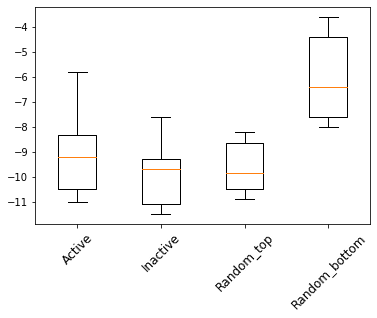

In [49]:
fig, ax = plt.subplots()
plot = ax.boxplot([active_dock_energies,
                   inactive_dock_energies,
                   random_dock_energies_top,
                   random_dock_energies_bottom
                  ])
ax.set_xticklabels(["Active","Inactive","Random_top", "Random_bottom"],
                    rotation=45, fontsize=12)

### How can we refine this?

In [62]:
!./reduce data/6cm4_clean.pdb > data/6cm4_clean_h.pdb

reduce: version 3.23 05/21/2013, Copyright 1997-2013, J. Michael Word
Processing file: "data/6cm4_clean.pdb"
Database of HETATM connections: "/usr/local/reduce_wwPDB_het_dict.txt"
VDW dot density = 16/A^2
Orientation penalty scale = 1 (100%)
Eliminate contacts within 3 bonds.
Ignore atoms with |occupancy| <= 0.01 during adjustments.
Waters ignored if B-Factor >= 40 or |occupancy| < 0.66
Aromatic rings in amino acids accept hydrogen bonds.
Building or keeping OH & SH Hydrogens.
Rotating NH3 Hydrogens.
Processing Met methyls.
ERROR CTab(/usr/local/reduce_wwPDB_het_dict.txt): could not open
*WARNING*: Residues PRO 139  and THR 144  in chain  A appear unbonded 
            and will be treated as a chain break
*WARNING*: Residues PRO 139  and THR 144  in chain  A appear unbonded 
            and will be treated as a chain break
*WARNING*: Residues TYR 1161  and SER 364  in chain  A appear unbonded 
            and will be treated as a chain break
*WARNING*: Residues TYR 1161  and SER 364  i

In [0]:
from src import SIFt

In [0]:
interactions = SIFt.SIFt_generator()

In [65]:
all_interactions = interactions.get_all_interactions("data/6cm4_clean_h.pdb", "data/6cm4_clean_active0.sdf")

/usr/local/lib/python3.7/site-packages/Bio/PDB/Atom.py:189: PDBConstructionWarning: Used element 'N' for Atom (name=N) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/usr/local/lib/python3.7/site-packages/Bio/PDB/Atom.py:189: PDBConstructionWarning: Used element 'C' for Atom (name=CA) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/usr/local/lib/python3.7/site-packages/Bio/PDB/Atom.py:189: PDBConstructionWarning: Used element 'C' for Atom (name=C) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/usr/local/lib/python3.7/site-packages/Bio/PDB/Atom.py:189: PDBConstructionWarning: Used element 'O' for Atom (name=O) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/usr/local/lib/python3.7/site-packages/Bio/PDB/Atom.py:189: PDBConstructionWarning: Used element 'C' for Atom (name=CB) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/usr/local/lib/python3.7/site-packages/Bio/PDB/Atom.py:189: PDBConst

In [66]:
all_interactions

{0: {35: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  36: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  37: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  38: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  39: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  40: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  41: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  42: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  43: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  44: [1, 1, 1, 0, 1, 0, 0, 0, 0],
  45: [1, 0, 1, 0, 1, 0, 0, 0, 0],
  46: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  47: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  48: [1, 1, 1, 0, 1, 0, 0, 0, 0],
  49: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  50: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  51: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  52: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  53: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  54: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  55: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  56: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  57: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  58: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  59: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  60: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  61: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  62: [0, 0, 0, 0, 0, 0, 0, 0, 0],
  63: [0, 0, 0, 0

In [67]:
for n in all_interactions:
    print(np.sum(np.array([a for a in all_interactions[n].values()]), axis=0))

[21  5 21  7 14  0  0  7  0]
[17  3 17  4 13  0  0  5  0]
[21  2 21  4 17  0  0  7  0]
[20  7 20  6 14  0  0  6  0]
[18  2 18  4 14  0  0  5  0]
[17  2 17  4 13  0  0  5  0]
[18  3 18  5 13  0  0  5  0]
[17  4 17  3 14  0  0  6  0]
[19  3 19  4 15  0  0  6  0]
